<a href="https://colab.research.google.com/github/Samruddhirajesh/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Project_on_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**Column Description **

Date : year-month-day

• Rented Bike count - Count of bikes rented at each hour

• Hour - Hour of the day

• Temperature-Temperature in Celsius

• Humidity - %

• Windspeed - m/s

• Visibility - 10m

• Dew point temperature - Celsius

• Solar radiation - MJ/m2

• Rainfall - mm

• Snowfall - cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'unicode_escape')


In [ ]:

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# checking null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# converting date column dtype to date
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-184-9e865bcfc436>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#spliting date in year,month and day
df['day'] = df['Date'].dt.day_name()
df["month"] = df['Date'].dt.month_name()
df["year"] = df['Date'].map(lambda x: x.year).astype("object")

In [ ]:
df['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [ ]:
df['Rented Bike Count'].min(),df['Rented Bike Count'].max()

(0, 3556)

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
categorical_columns = list(set(df.columns) - set(numeric_features))
categorical_columns

['year', 'Functioning Day', 'Holiday', 'Date', 'month', 'Seasons', 'day']

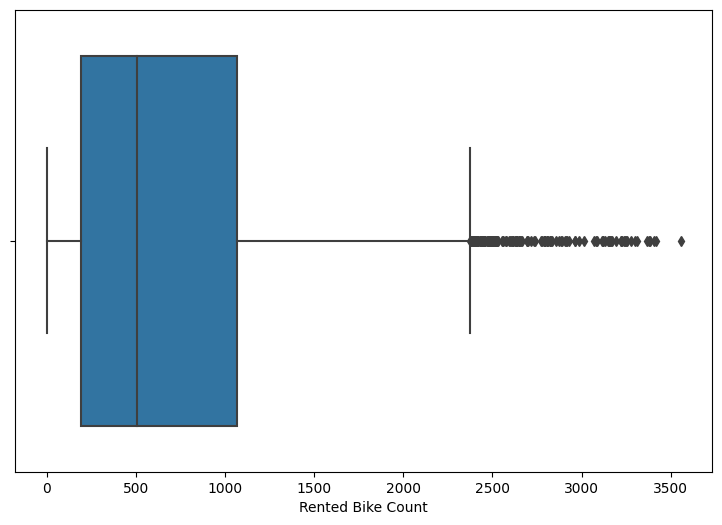

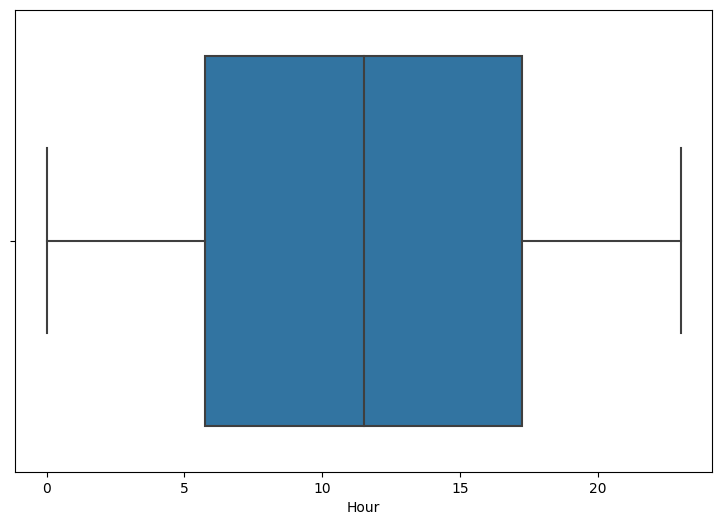

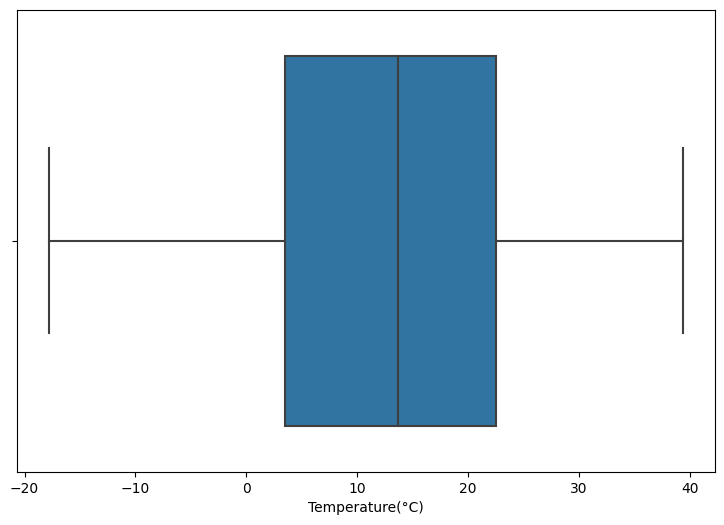

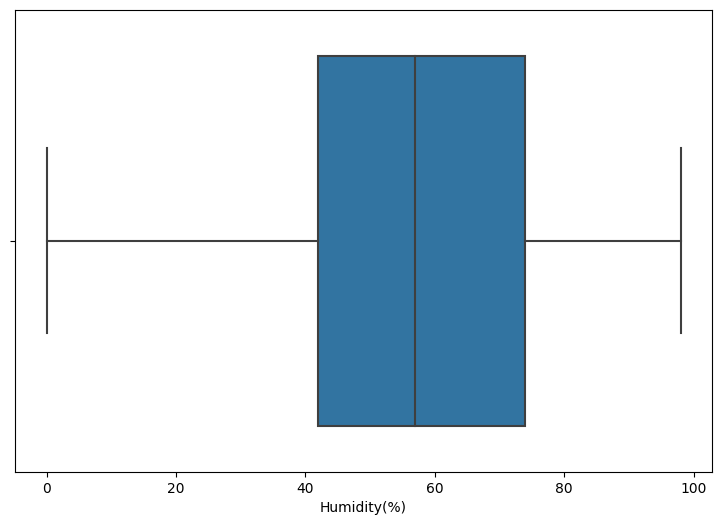

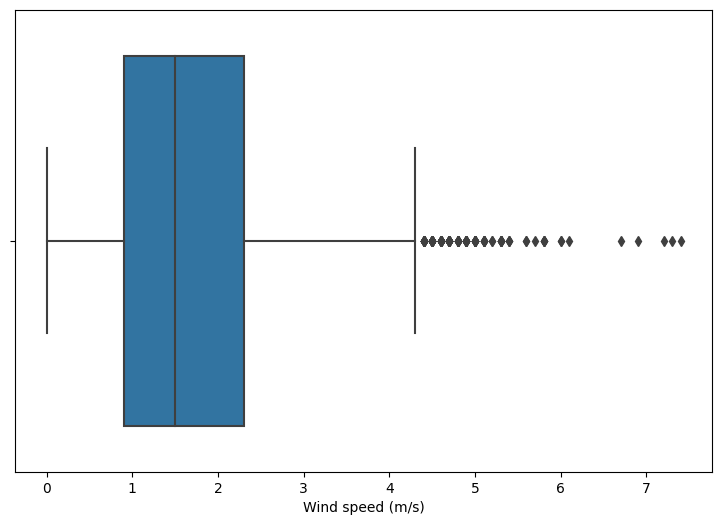

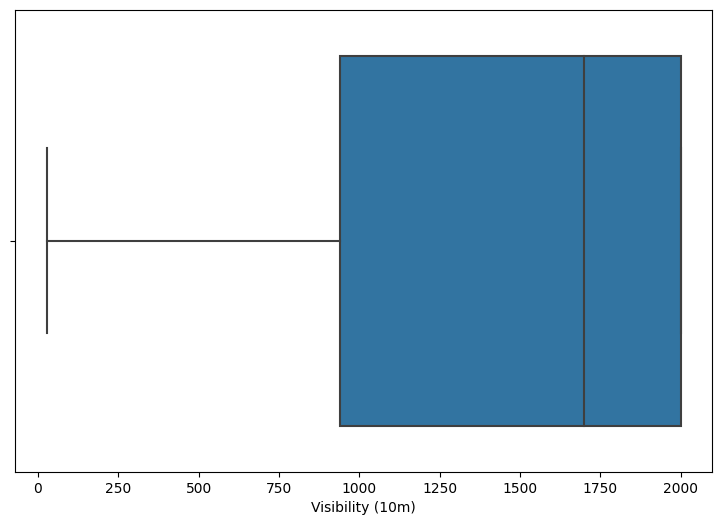

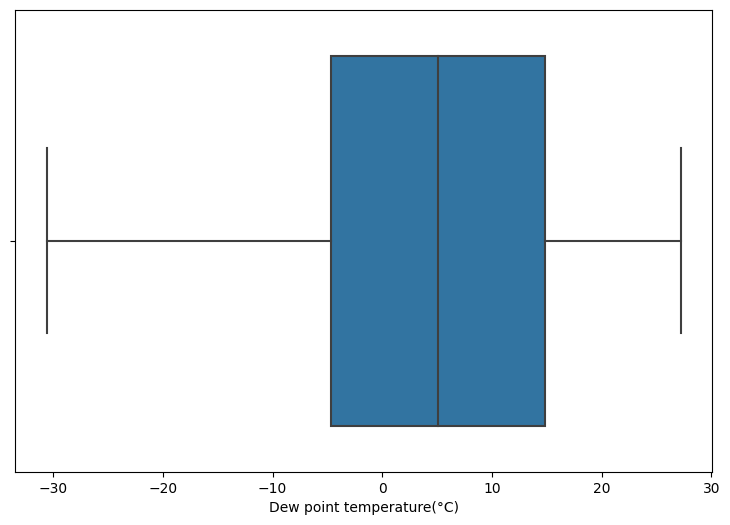

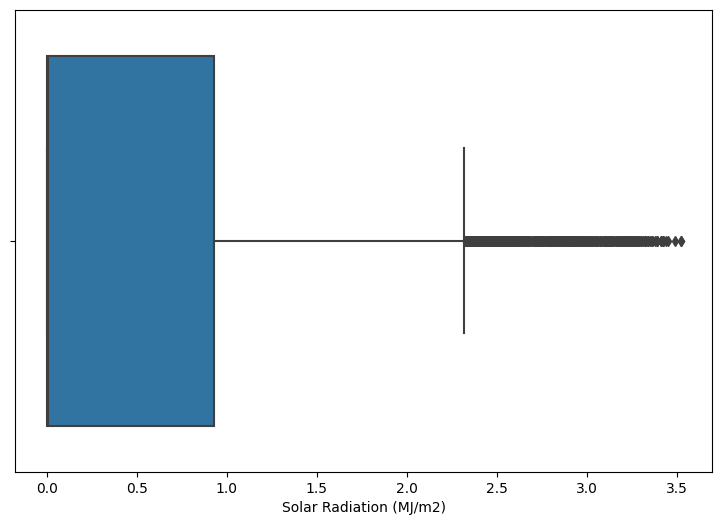

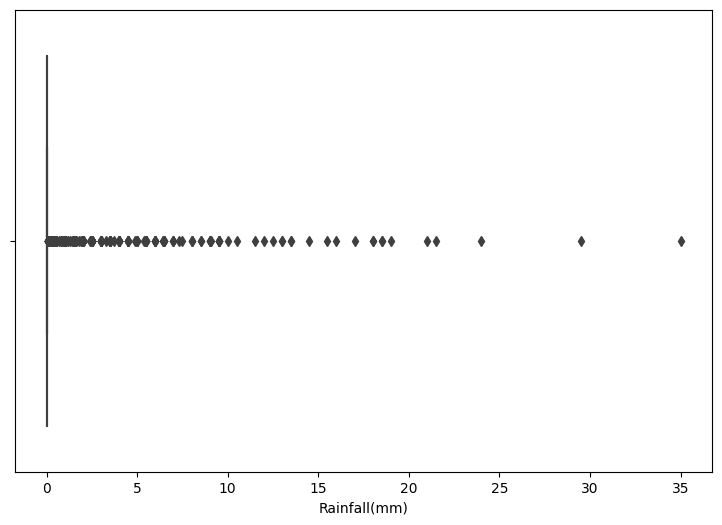

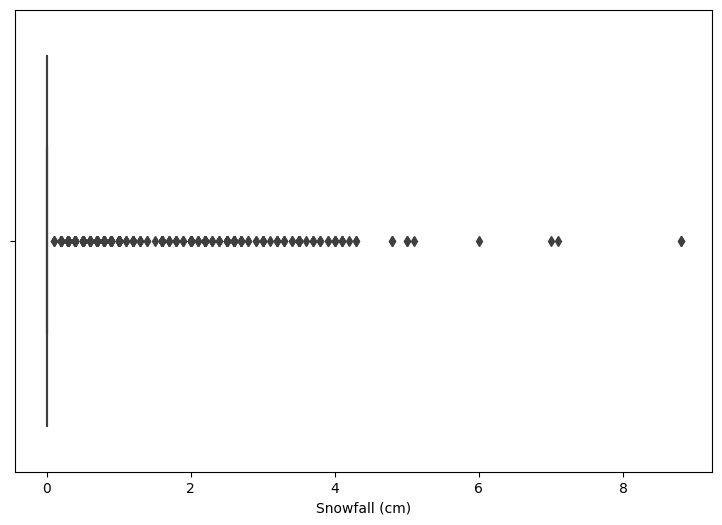

In [ ]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

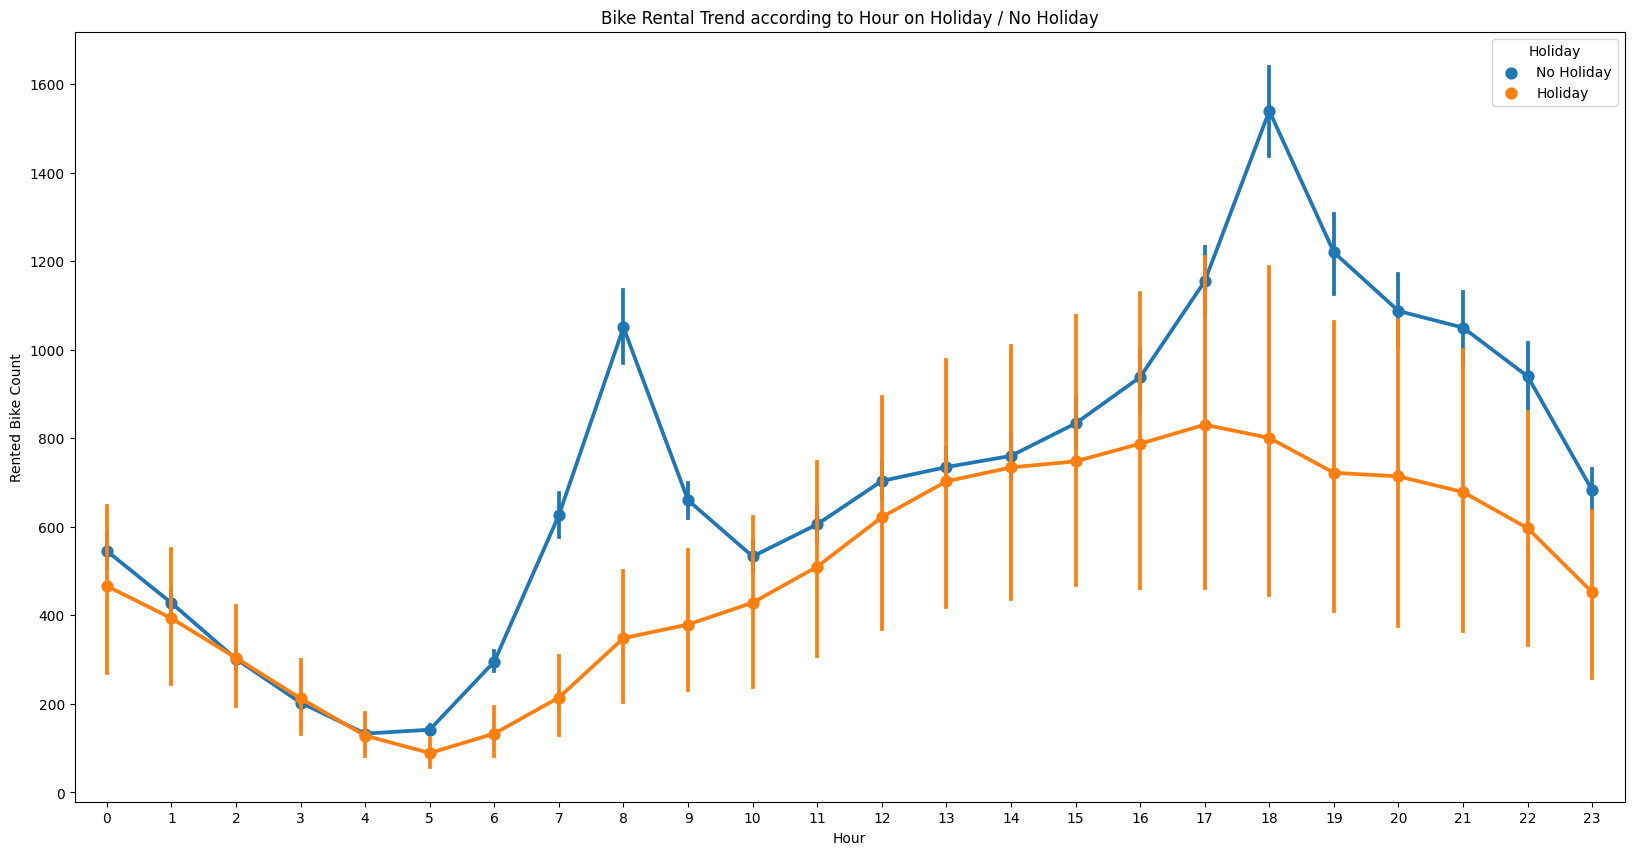

In [ ]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue= df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day.')

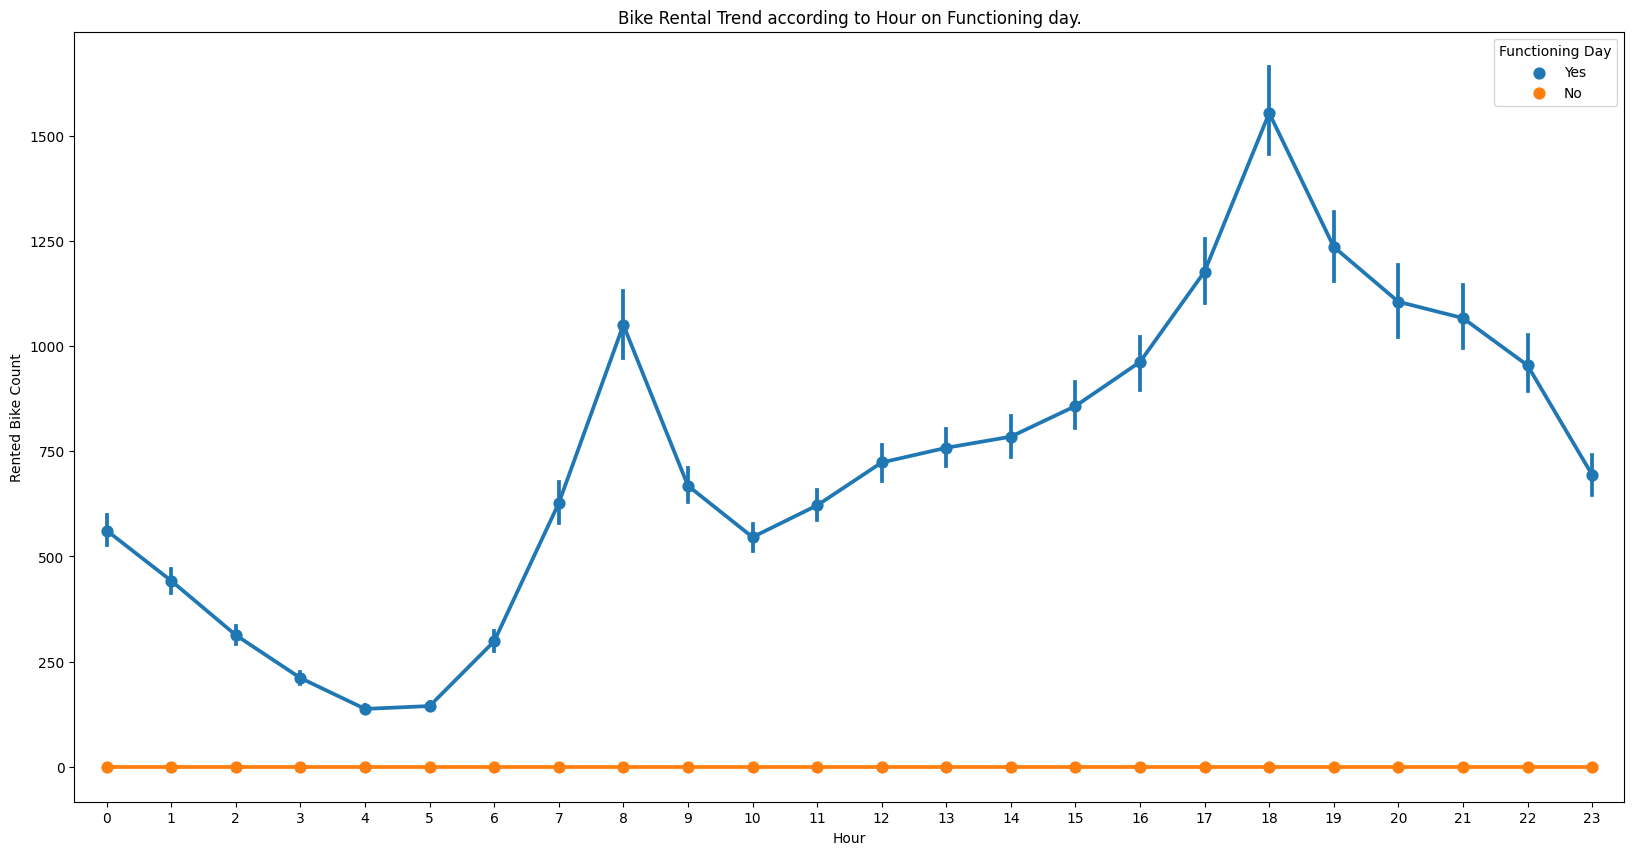

In [ ]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['Functioning Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day.")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Seasons')

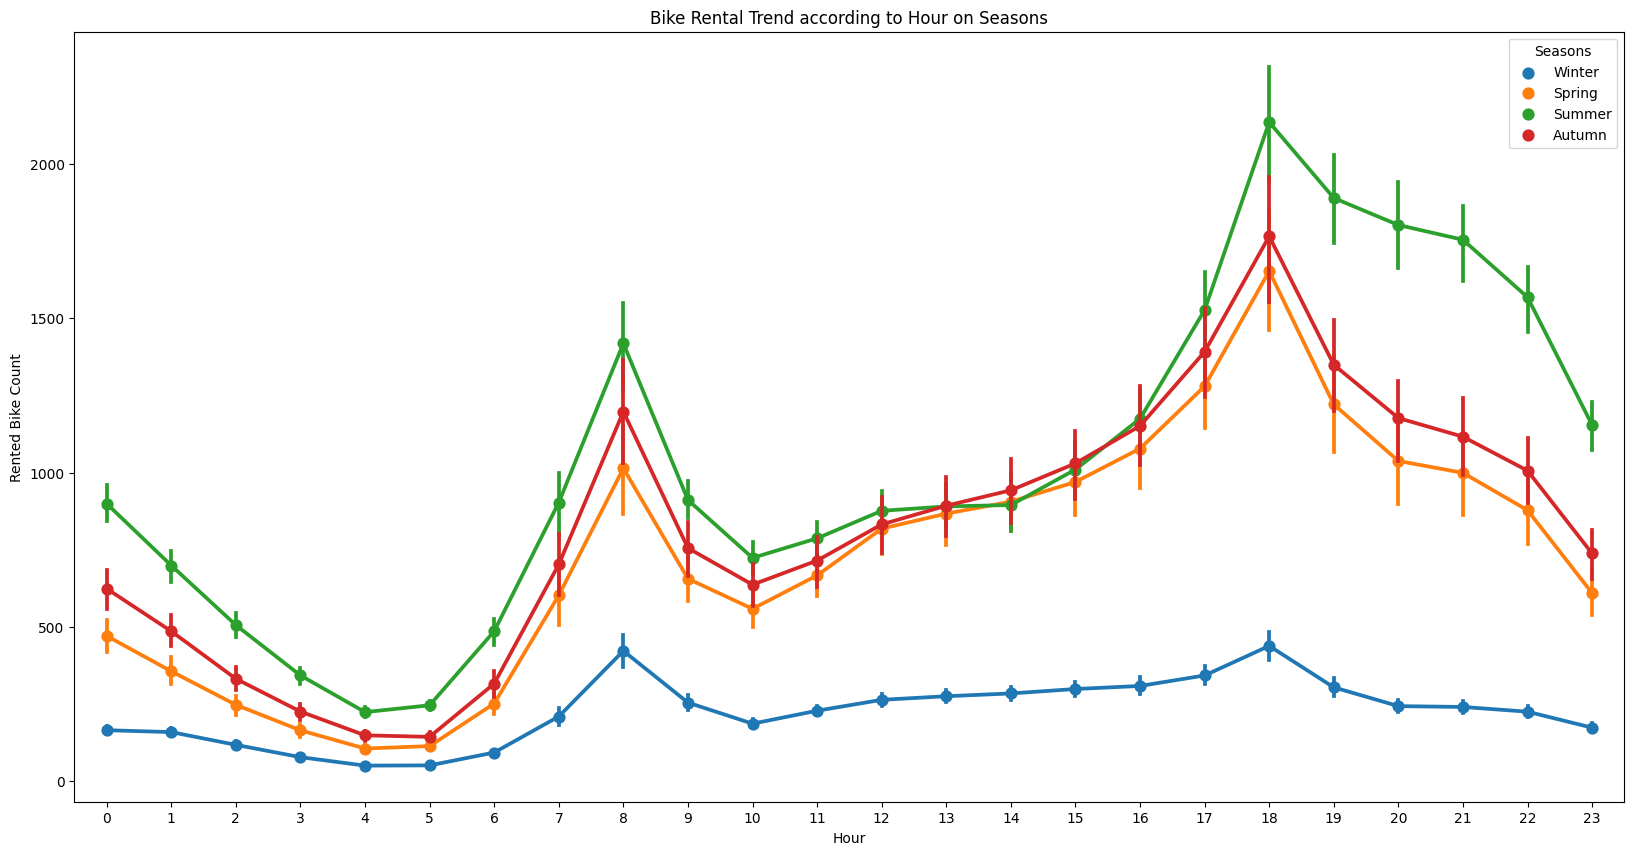

In [ ]:
# Bike Rental trend with respect to Hour on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['Seasons'])
plt.title("Bike Rental Trend according to Hour on Seasons")

<ipython-input-195-95192d204535>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['Rented Bike Count'],color='g',ax=axes[0])


<Axes: xlabel='Rented Bike Count'>

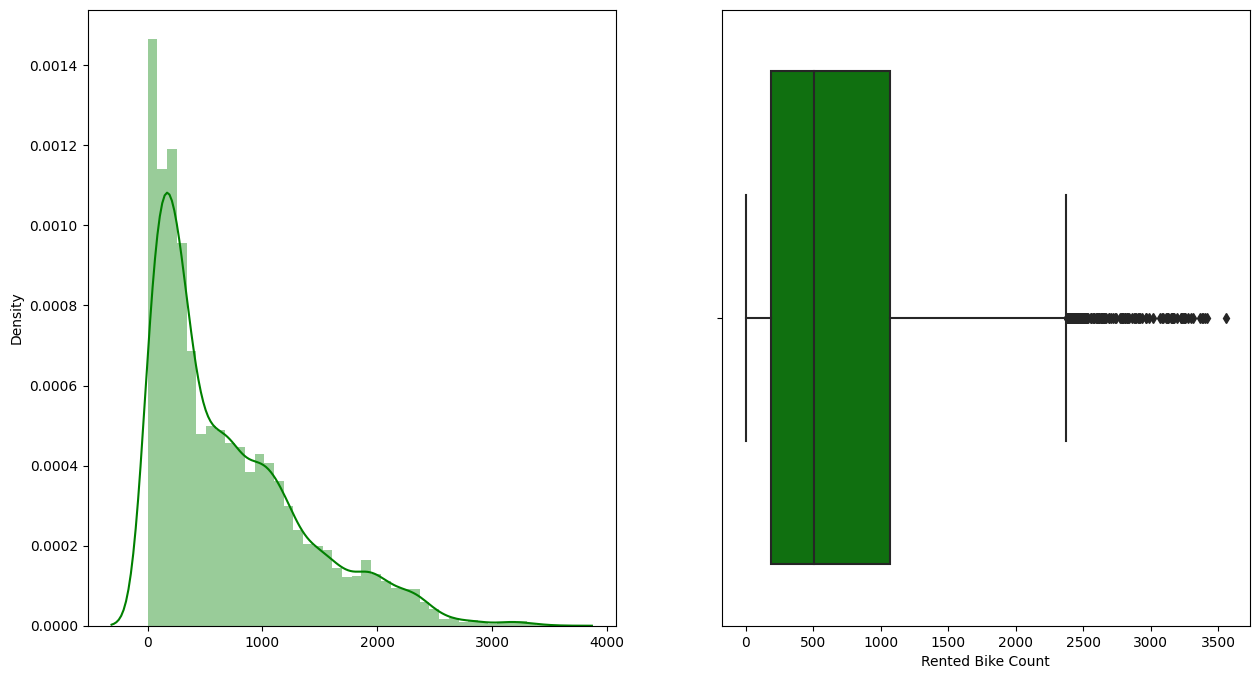

In [ ]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['Rented Bike Count'],color='g',ax=axes[0])
sns.boxplot(x = df['Rented Bike Count'],color='g',ax=axes[1])

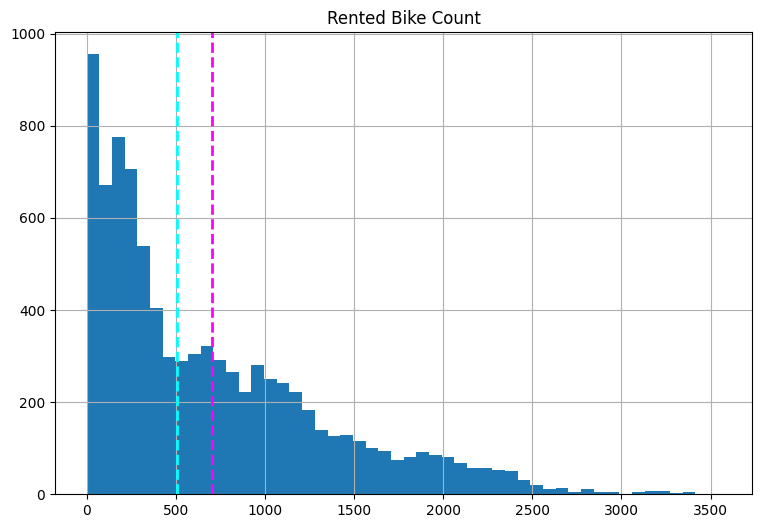

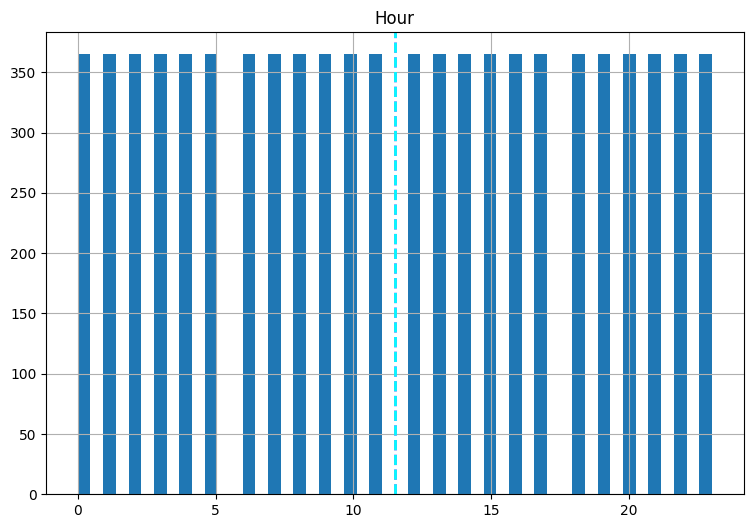

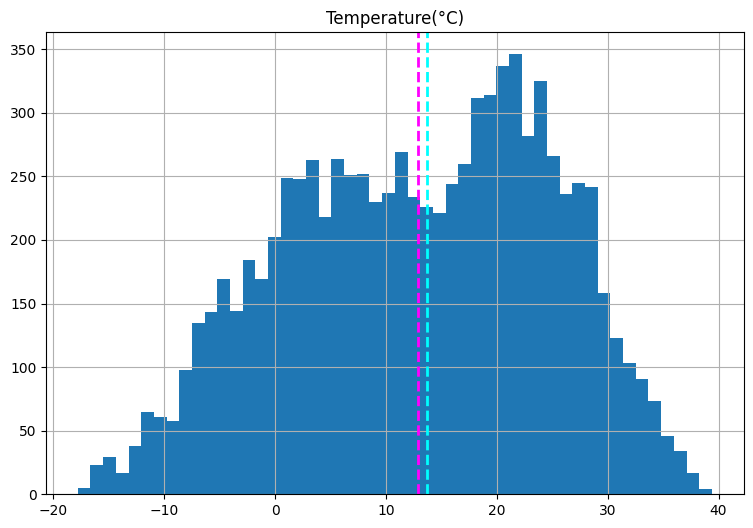

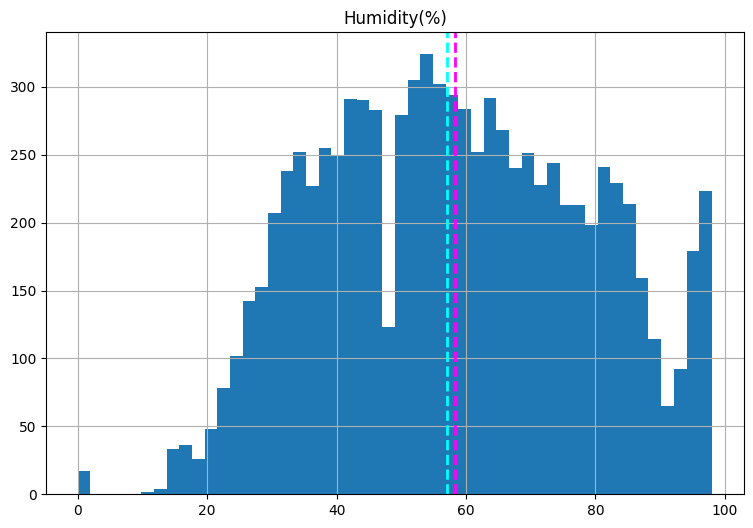

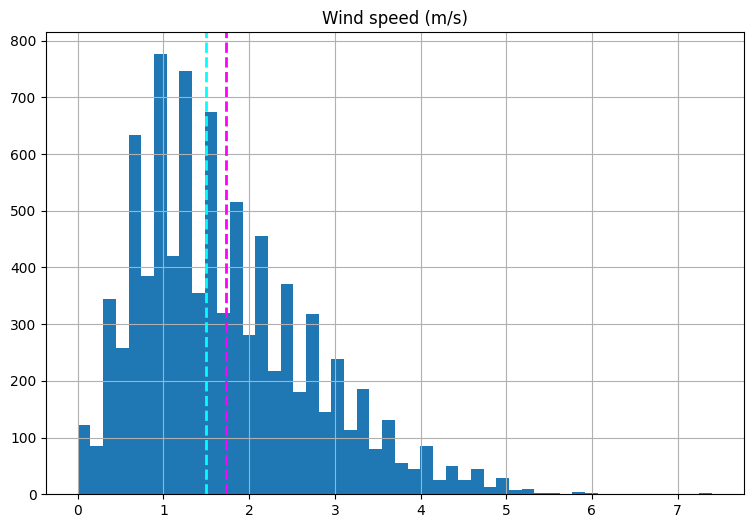

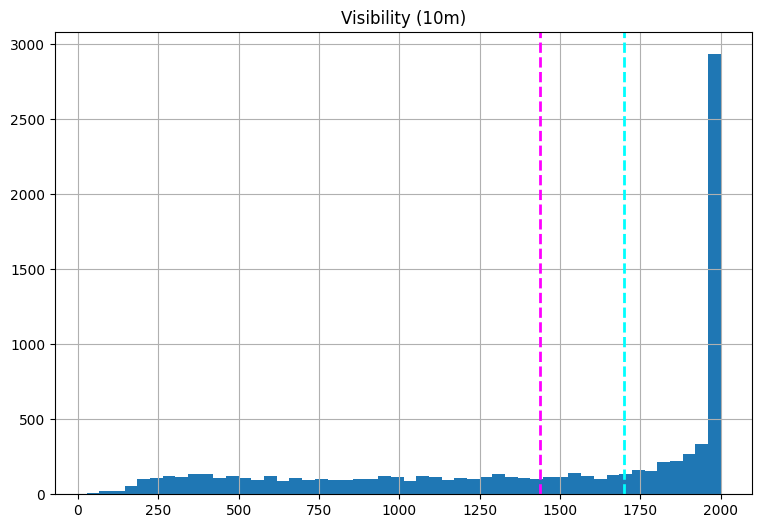

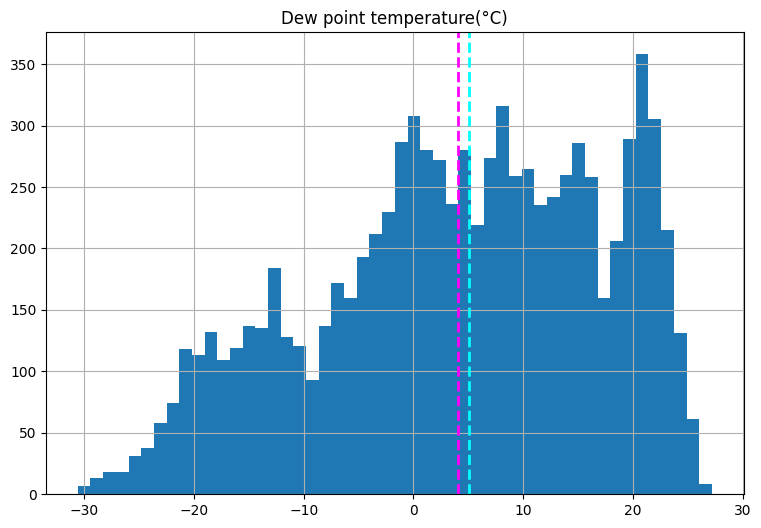

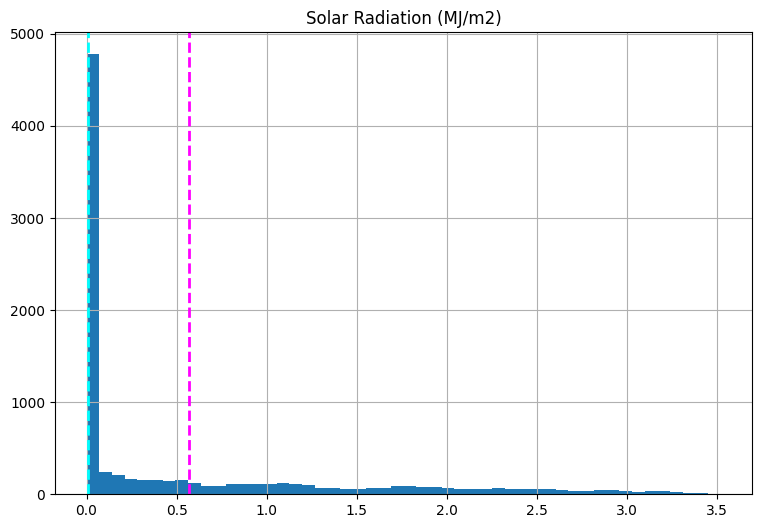

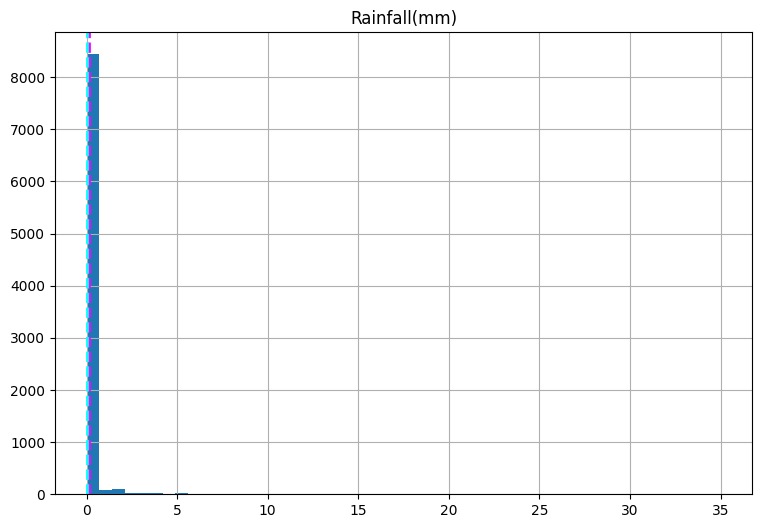

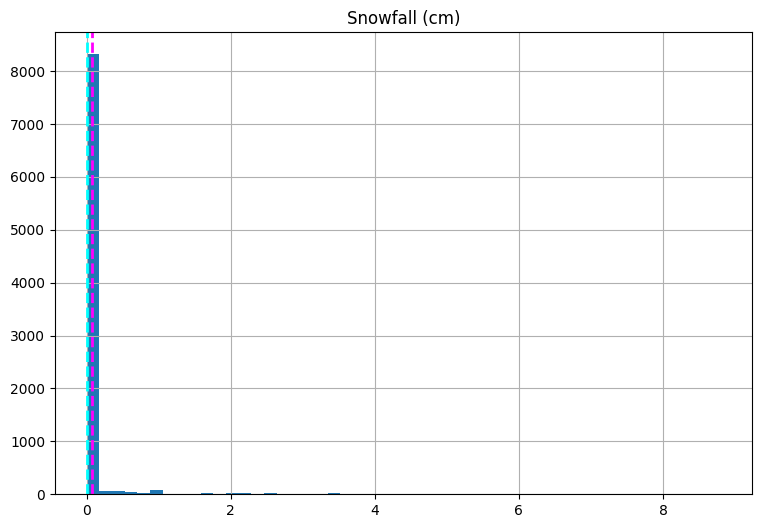

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


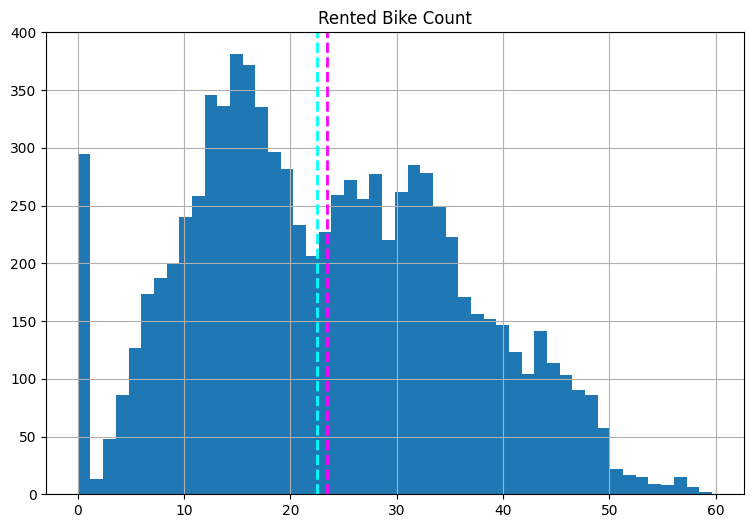

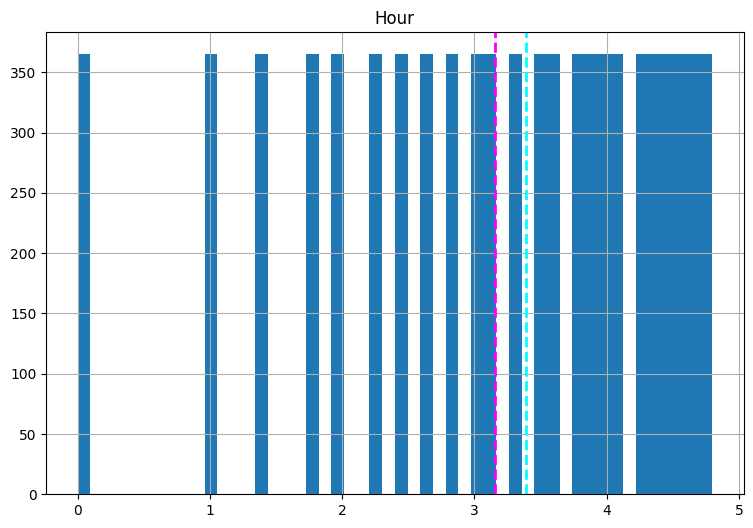

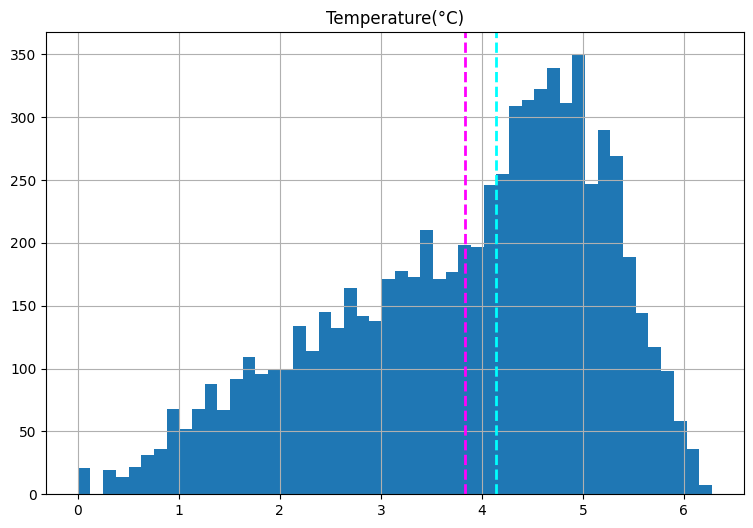

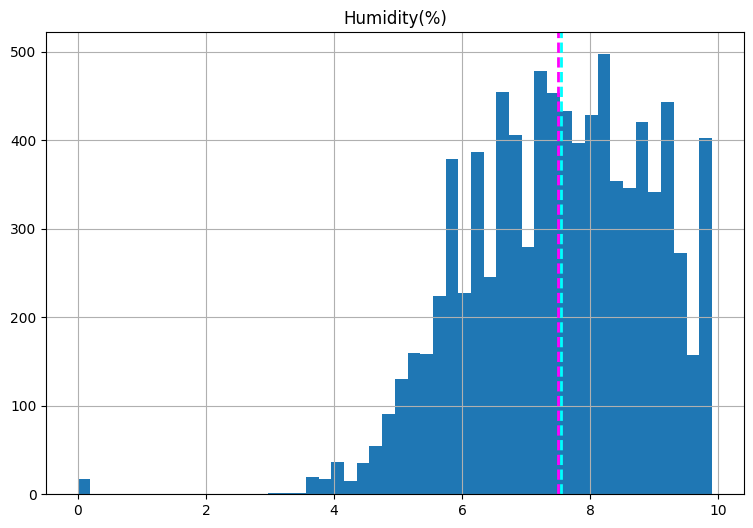

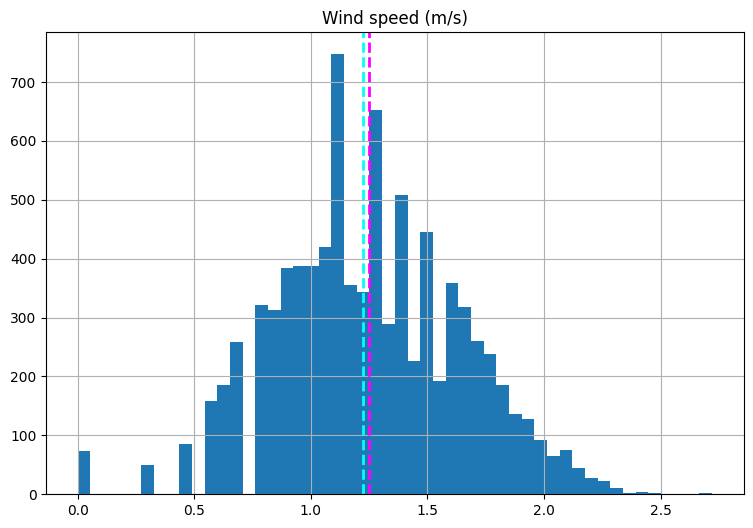

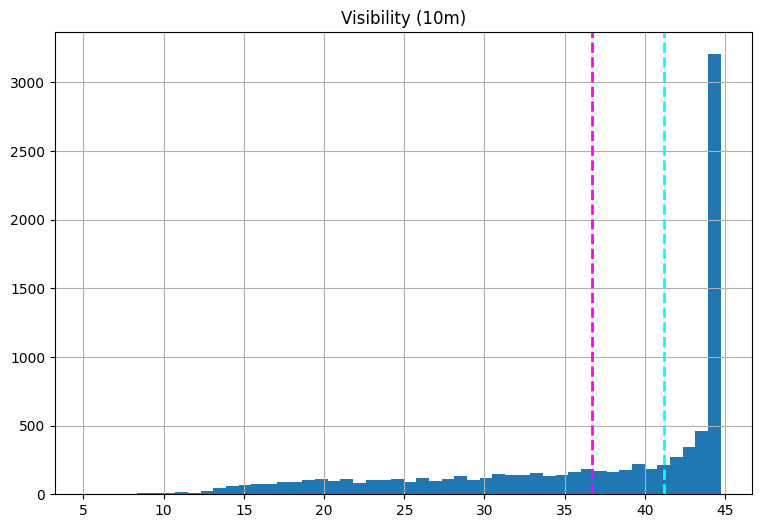

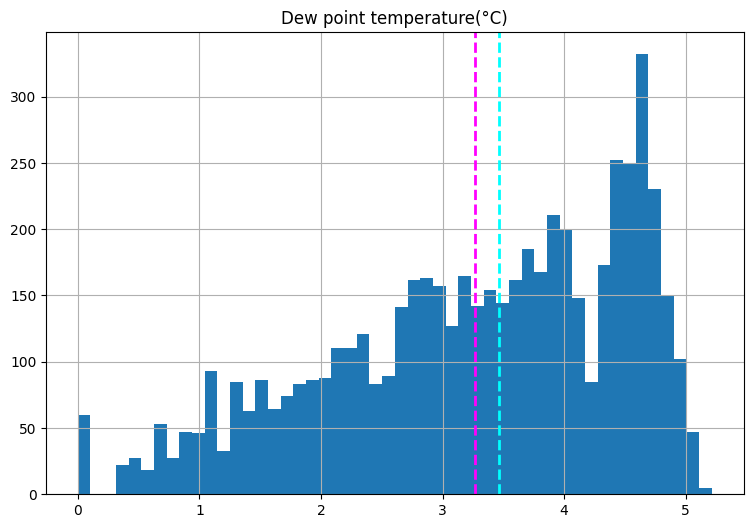

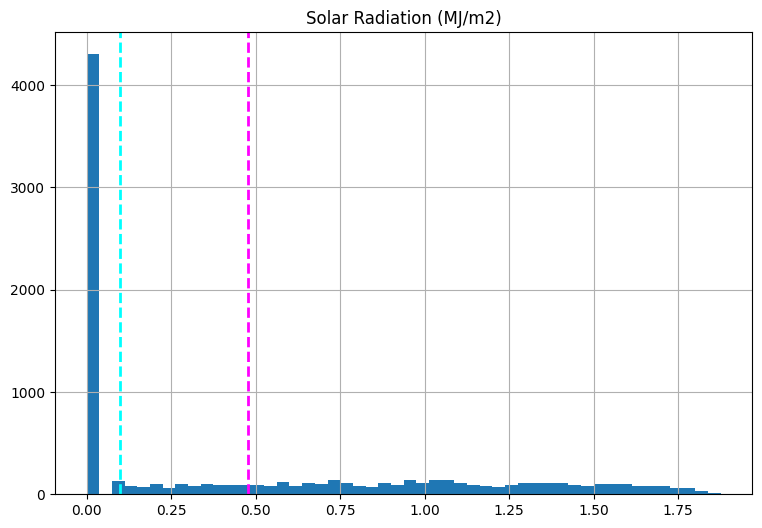

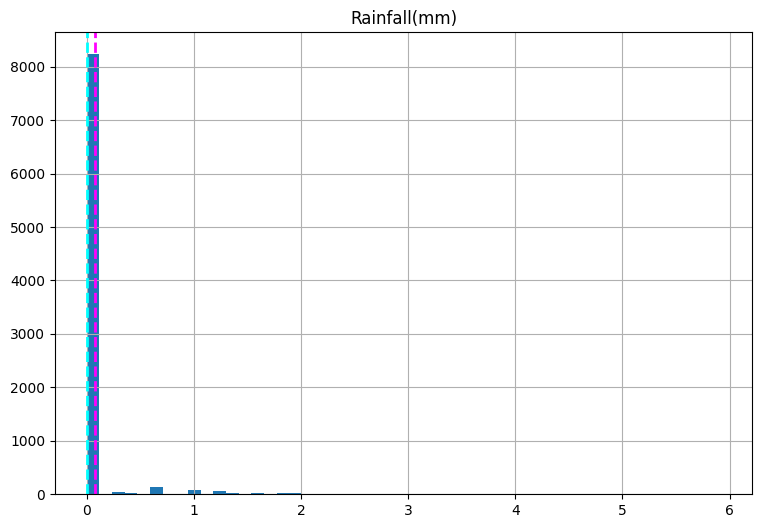

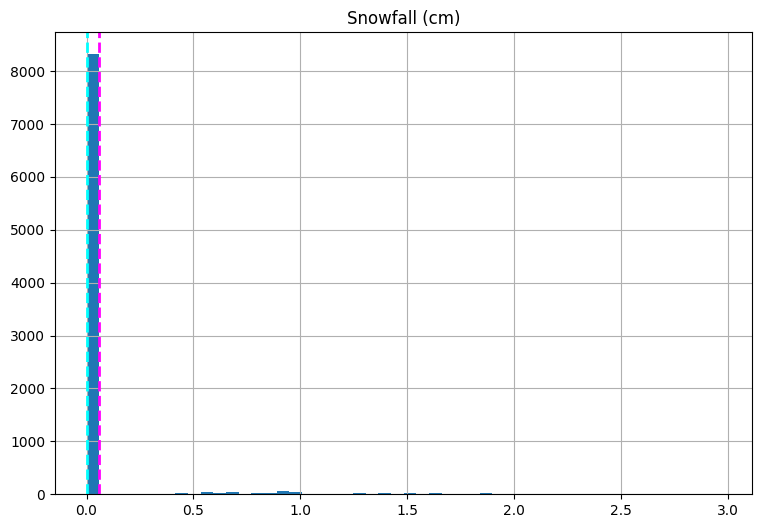

In [ ]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

<ipython-input-198-105eaa61831f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

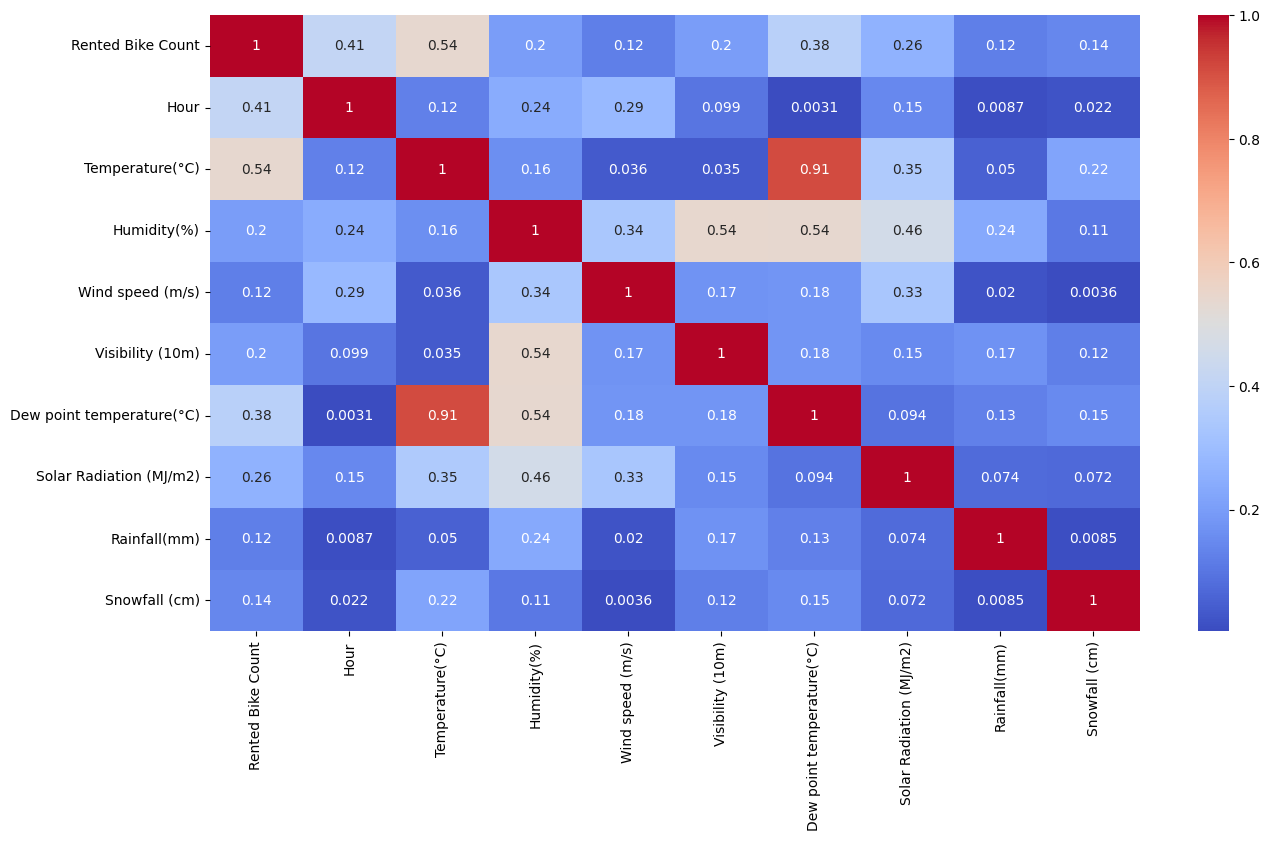

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Create dummy variables for the catgeorical variable Season
df['Spring'] = np.where(df['Seasons'] == 'Spring', 1, 0)
df['Summer'] = np.where(df['Seasons'] == 'Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons'] == 'Autumn', 1, 0)
df['Winter'] = np.where(df['Seasons'] == 'Winter', 1, 0)

In [ ]:
df.drop(columns=['Seasons'],axis=1,inplace=True)

In [ ]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Labele for holiday=1 and no holiday=0
df['Holiday'] = df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
# Labeling for Yes=1 and no No=0
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1, 'No':0})

In [ ]:
# Checking dummy and labeled columns
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,day,month,year,Spring,Summer,Autumn,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,Thursday,January,2017,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,Thursday,January,2017,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,Thursday,January,2017,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,Thursday,January,2017,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,Thursday,January,2017,0,0,0,1


In [ ]:
# Final info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Holiday                    8760 non-null   int64         
 12  Functi

In [ ]:
# Importing train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [ ]:
# Creating a dependent variable for rented bike count
dependent_variable = 'Rented Bike Count'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Snowfall (cm)',
 'Holiday',
 'Date',
 'Rainfall(mm)',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)',
 'month',
 'Dew point temperature(°C)',
 'Visibility (10m)',
 'Hour',
 'Winter',
 'year',
 'Functioning Day',
 'Humidity(%)',
 'Autumn',
 'Wind speed (m/s)',
 'Spring',
 'day',
 'Summer']

In [ ]:
# Create the dependent variable data
y = np.sqrt(df['Rented Bike Count'])

# Create the data of independent variables
X = df.drop('Rented Bike Count',axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print('x-train shape',x_train.shape)
print('x-test shape' , x_test.shape)
print('y-train shape' , y_train.shape)
print('y-test shape ', y_test.shape)


x-train shape (7008, 19)
x-test shape (1752, 19)
y-train shape (7008,)
y-test shape  (1752,)


In [ ]:
X_train[0:10]

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,day,month,year,Spring,Summer,Autumn,Winter
2031,2018-02-23,15,8.2,62,0.6,291,1.3,1.22,0.0,0.0,0,1,Friday,February,2018,0,0,0,1
6570,2018-08-31,18,28.4,57,2.4,2000,19.0,0.84,0.0,0.0,0,1,Friday,August,2018,0,1,0,0
6371,2018-08-23,11,29.9,57,1.7,1992,20.4,0.88,0.1,0.0,0,1,Thursday,August,2018,0,1,0,0
3490,2018-04-25,10,14.8,29,0.6,1749,-3.0,2.20,0.0,0.0,0,1,Wednesday,April,2018,1,0,0,0
7700,2018-10-17,20,12.2,47,1.1,2000,1.2,0.00,0.0,0.0,0,1,Wednesday,October,2018,0,0,1,0
3136,2018-10-04,16,20.9,34,5.8,2000,4.4,1.37,0.0,0.0,0,1,Thursday,October,2018,1,0,0,0
7122,2018-09-23,18,22.3,53,2.7,2000,12.2,0.44,0.0,0.0,1,1,Sunday,September,2018,0,0,1,0
6376,2018-08-23,16,31.7,56,1.9,2000,21.8,0.92,0.0,0.0,0,1,Thursday,August,2018,0,1,0,0
7071,2018-09-21,15,21.8,76,1.4,2000,17.3,1.20,0.0,0.0,0,1,Friday,September,2018,0,0,1,0
7294,2018-09-30,22,14.6,46,2.2,2000,3.0,0.00,0.0,0.0,0,0,Sunday,September,2018,0,0,1,0


In [ ]:
X = df.drop(columns='Rented Bike Count')
y = np.sqrt(df['Rented Bike Count'])

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
X_train.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,day,month,year,Spring,Summer,Autumn,Winter
2223,2018-03-03,15,16.0,14,2.2,1828,-11.5,2.33,0.0,0.0,0,1,Saturday,March,2018,1,0,0,0
798,2018-03-01,6,-6.7,48,2.4,1991,-15.9,0.00,0.0,0.0,0,1,Thursday,March,2018,0,0,0,1
7752,2018-10-20,0,11.3,71,1.2,1997,6.2,0.00,0.0,0.0,0,1,Saturday,October,2018,0,0,1,0
734,2017-12-31,14,3.0,28,3.8,1956,-13.7,1.10,0.0,0.0,1,1,Sunday,December,2017,0,0,0,1
2881,2018-03-31,1,11.5,77,2.0,593,7.6,0.00,0.0,0.0,0,1,Saturday,March,2018,1,0,0,0


In [ ]:
X_test.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,day,month,year,Spring,Summer,Autumn,Winter
6056,2018-10-08,8,27.2,69,1.8,1999,21.0,0.70,0.0,0.0,0,1,Monday,October,2018,0,1,0,0
5556,2018-07-20,12,32.6,51,2.1,800,21.1,3.21,0.0,0.0,0,1,Friday,July,2018,0,1,0,0
5990,2018-07-08,14,34.0,50,1.2,1744,22.1,1.68,0.0,0.0,0,1,Sunday,July,2018,0,1,0,0
7674,2018-10-16,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,0,1,Tuesday,October,2018,0,0,1,0
3319,2018-04-18,7,6.4,51,1.0,1398,-3.0,0.19,0.0,0.0,0,1,Wednesday,April,2018,1,0,0,0


In [ ]:
y_train.head()

2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 19), (2190, 19), (6570,), (2190,))

In [ ]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))